# Python Pandas Project
## An analysis of data from the olist dataset.
## By Joshua Higginbotham


### Dataset info
[Kaggle link](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_orders_dataset.csv)
### In this analysis I will answer these business questions:
* What is our order processing time?
* What are the top product categories?

In [76]:
# setting up the environment
import pandas as pd
from datetime import datetime

In [78]:
# import needed tables as dataframes
orders_df = pd.read_csv('olist_orders_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
translation_df = pd.read_csv('product_category_name_translation.csv')
orders_df = orders_df.set_index('order_id')

In [77]:
# cleaning for question 1
q1_drop = ['customer_id','order_approved_at','order_estimated_delivery_date']
q1_df = orders_df.drop(columns=q1_drop)
q1_df = q1_df.dropna()
q1_df

,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date
order_id,,,,
e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13
53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45
47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29
949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42
ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02
...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01
63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56
83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17


In [80]:
#converting date type and creating the time to process field
q1_df['purchase_time'] = pd.to_datetime(q1_df['order_purchase_timestamp'])
q1_df['processed_time'] = pd.to_datetime(q1_df['order_delivered_carrier_date'])
q1_df['time_to_process'] = q1_df['processed_time'] - q1_df['purchase_time']

In [81]:
q1_df.describe()

,time_to_process
count,96475
mean,3 days 05:27:56.897144337
std,3 days 14:21:15.533195821
min,-172 days +18:54:07
25%,1 days 03:02:57
50%,2 days 04:50:23
75%,4 days 01:37:27.500000
max,125 days 18:36:45


In [82]:
#further cleaning was needed
q1_df['proc_time'] = pd.to_numeric(q1_df['time_to_process'])
q1_df = q1_df.query('proc_time >= 0')

## Question 1: What is our order processing time?

In [45]:
q1_df.describe()

,time_to_process,proc_time
count,96310,9.631000e+04
mean,3 days 05:38:36.206126051,2.795162e+14
std,3 days 13:18:22.429154060,3.071024e+14
min,0 days 00:00:32,3.200000e+10
25%,1 days 03:07:46.500000,9.766650e+13
50%,2 days 04:55:47.500000,1.905475e+14
75%,4 days 01:41:39,3.516990e+14
max,125 days 18:36:45,1.086700e+16


In [69]:
# merging and cleaning for second question
q2_df = pd.merge(products_df, order_items_df, how='right', on='product_id')
q2_df = pd.merge(q2_df, translation_df, how='left', on='product_category_name')
q2_df = pd.merge(q2_df, orders_df, how='left', on='order_id')
q2_drop = ['order_status', 'price', 'freight_value', 'seller_id', 'shipping_limit_date', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_name_lenght', 'product_description_lenght', 'product_category_name', 'customer_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
q2_df = q2_df.drop(columns = q2_drop)
q2_df = q2_df.dropna()
q2_df

,product_id,order_id,order_item_id,product_category_name_english,order_purchase_timestamp
0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,1,cool_stuff,2017-09-13 08:59:02
1,e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3,1,pet_shop,2017-04-26 10:53:06
2,c777355d18b72b67abbeef9df44fd0fd,000229ec398224ef6ca0657da4fc703e,1,furniture_decor,2018-01-14 14:33:31
3,7634da152a4610f1595efa32f14722fc,00024acbcdf0a6daa1e931b038114c75,1,perfumery,2018-08-08 10:00:35
4,ac6c3623068f30de03045865e4e10089,00042b26cf59d7ce69dfabb4e55b4fd9,1,garden_tools,2017-02-04 13:57:51
...,...,...,...,...,...
112645,4aa6014eceb682077f9dc4bffebc05b0,fffc94f6ce00a00581880bf54a75a037,1,housewares,2018-04-23 13:57:06
112646,32e07fd915822b0765e448c4dd74c828,fffcd46ef2263f404302a634eb57f7eb,1,computers_accessories,2018-07-14 10:26:46
112647,72a30483855e2eafc67aee5dc2560482,fffce4705a9662cd70adb13d4a31832d,1,sports_leisure,2017-10-23 17:07:56
112648,9c422a519119dcad7575db5af1ba540e,fffe18544ffabc95dfada21779c9644f,1,computers_accessories,2017-08-14 23:02:59


In [68]:
q2_group = q2_df.groupby(by='product_category_name_english')

## Question 2: What are the top product categories?

In [73]:
q2_group.sum('order_item_id').sort_values('order_item_id', ascending=False).head(5)

,order_item_id
product_category_name_english,
bed_bath_table,13665
furniture_decor,11540
health_beauty,11081
sports_leisure,9932
computers_accessories,9874


<AxesSubplot:xlabel='product_category_name_english'>

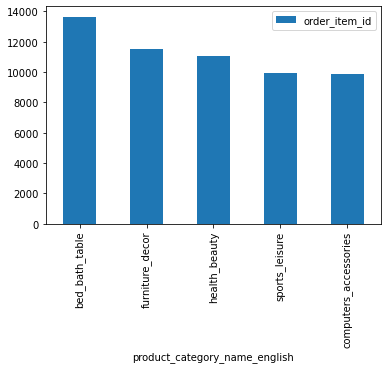

In [75]:
q2_group.sum('order_item_id').sort_values('order_item_id', ascending=False).head(5).plot(kind='bar')